# Correlation and Association Measures Tutorial

This notebook covers methods to quantify relationships between variables:
- **Pearson correlation**: Linear relationship between continuous variables
- **Spearman correlation**: Monotonic relationship (rank-based)
- **Contingency tables & Chi-square test**: Association between categorical variables
- **Cramér's V**: Strength of association for categorical variables
- **Conditional correlation**: Correlation within subgroups

Examples use the Titanic dataset (df), exercises use the iris dataset.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load datasets
df = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')

# Preview Titanic data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
## 1. Pearson Correlation

**Pearson correlation coefficient (r)** measures the strength and direction of the **linear relationship** between two continuous variables.

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Values range from -1 (perfect negative) to +1 (perfect positive). Zero means no linear relationship.

**Example:**

In [42]:
# Calculate Pearson correlation between age and fare
# Using pandas .corr() method
corr_age_fare = df['age'].corr(df['fare'])
print(f"Pearson correlation (age vs fare): {corr_age_fare:.4f}")

Pearson correlation (age vs fare): 0.0961


In [43]:
# Pearson correlation using pandas
df_clean = df[['age', 'fare']].dropna()
r = df_clean['age'].corr(df_clean['fare'])
print(f"Pearson r = {r:.4f}")

Pearson r = 0.0961


In [44]:
# Correlation matrix for multiple variables
numeric_cols = df[['age', 'fare', 'sibsp', 'parch']].dropna()
corr_matrix = numeric_cols.corr(method='pearson')
print("Correlation Matrix:")
corr_matrix

Correlation Matrix:


,age,fare,sibsp,parch
age,1.000000,0.096067,-0.308247,-0.189119
fare,0.096067,1.000000,0.138329,0.205119
sibsp,-0.308247,0.138329,1.000000,0.383820
parch,-0.189119,0.205119,0.383820,1.000000


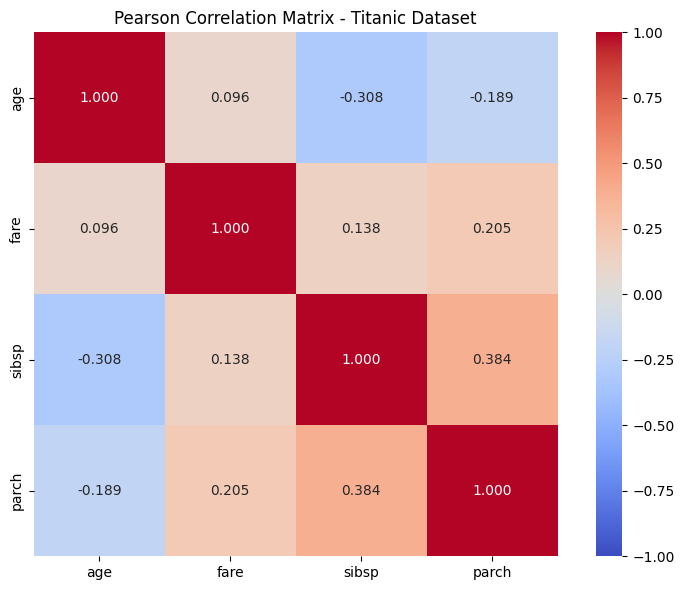

In [45]:
# Visualize correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            vmin=-1, vmax=1, fmt='.3f', square=True)
plt.title('Pearson Correlation Matrix - Titanic Dataset')
plt.tight_layout()
plt.show()

### Exercise 1: Pearson Correlation

**1.1** Calculate the Pearson correlation between `sepal_length` and `petal_length` in the iris dataset.

**1.2** Calculate the Pearson correlation between `sepal_width` and `petal_width` using pandas `.corr()` method.

**1.3** Create a correlation matrix for all numeric columns in iris and display it as a heatmap.

In [46]:
# Exercise 1.1: Pearson correlation between sepal_length and petal_length
corr_sepal_petal = iris['sepal_length'].corr(iris['petal_length'])
print(f"Pearson correlation (sepal_length vs petal_length): {corr_sepal_petal:.4f}")

Pearson correlation (sepal_length vs petal_length): 0.8718


In [47]:
# Exercise 1.2: Pearson correlation (sepal_width vs petal_width)
r = iris['sepal_width'].corr(iris['petal_width'])
print(f"Pearson r = {r:.4f}")

Pearson r = -0.3661


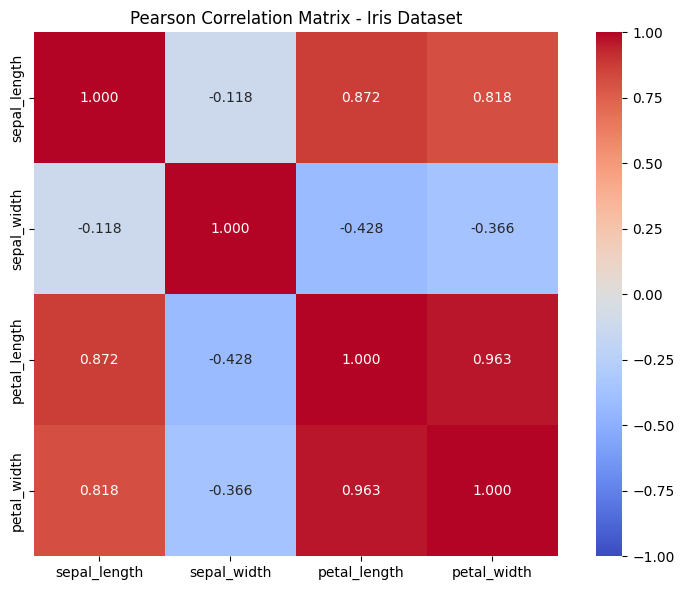

In [48]:
# Exercise 1.3: Correlation matrix heatmap for iris
iris_numeric = iris.select_dtypes(include=[np.number])
corr_matrix_iris = iris_numeric.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_iris, annot=True, cmap='coolwarm', center=0, 
            vmin=-1, vmax=1, fmt='.3f', square=True)
plt.title('Pearson Correlation Matrix - Iris Dataset')
plt.tight_layout()
plt.show()

---
## 2. Spearman Correlation

**Spearman's rank correlation (ρ)** measures the strength and direction of the **monotonic relationship** between two variables. It works on ranks instead of raw values, making it:
- Robust to outliers
- Suitable for ordinal data
- Able to detect non-linear monotonic relationships

$$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2-1)}$$

where $d_i$ is the difference between ranks.

**Example:**

In [49]:
# Spearman correlation using pandas
spearman_corr = df['age'].corr(df['fare'], method='spearman')
print(f"Spearman correlation (age vs fare): {spearman_corr:.4f}")

Spearman correlation (age vs fare): 0.1351


In [50]:
# Spearman correlation using pandas
df_clean = df[['age', 'fare']].dropna()
rho = df_clean['age'].corr(df_clean['fare'], method='spearman')
print(f"Spearman ρ = {rho:.4f}")

Spearman ρ = 0.1351


In [51]:
# Compare Pearson vs Spearman on data with outliers
np.random.seed(42)
x = np.arange(1, 21)
y = x + np.random.normal(0, 1, 20)
y_outlier = y.copy()
y_outlier[-1] = 100  # Add outlier

# Using pandas Series for correlation
x_series = pd.Series(x)
y_series = pd.Series(y)
y_outlier_series = pd.Series(y_outlier)

pearson_clean = x_series.corr(y_series)
spearman_clean = x_series.corr(y_series, method='spearman')
pearson_outlier = x_series.corr(y_outlier_series)
spearman_outlier = x_series.corr(y_outlier_series, method='spearman')

print("Without outlier:")
print(f"  Pearson r = {pearson_clean:.4f}, Spearman ρ = {spearman_clean:.4f}")
print("\nWith outlier:")
print(f"  Pearson r = {pearson_outlier:.4f}, Spearman ρ = {spearman_outlier:.4f}")
print("\n→ Spearman is more robust to outliers!")

Without outlier:
  Pearson r = 0.9900, Spearman ρ = 0.9895

With outlier:
  Pearson r = 0.5879, Spearman ρ = 0.9895

→ Spearman is more robust to outliers!


### Exercise 2: Spearman Correlation

**2.1** Calculate the Spearman correlation between `sepal_length` and `petal_length` in iris using pandas.

**2.2** Calculate the Spearman correlation between `sepal_width` and `petal_length` using pandas.

**2.3** Compare Pearson and Spearman correlations for all pairs of numeric variables in iris. Which pairs show the largest difference?

In [52]:
# Exercise 2.1: Spearman correlation (sepal_length vs petal_length)
spearman_sepal_petal = iris['sepal_length'].corr(iris['petal_length'], method='spearman')
print(f"Spearman correlation (sepal_length vs petal_length): {spearman_sepal_petal:.4f}")

Spearman correlation (sepal_length vs petal_length): 0.8819


In [53]:
# Exercise 2.2: Spearman correlation (sepal_width vs petal_length)
rho = iris['sepal_width'].corr(iris['petal_length'], method='spearman')
print(f"Spearman ρ = {rho:.4f}")

Spearman ρ = -0.3096


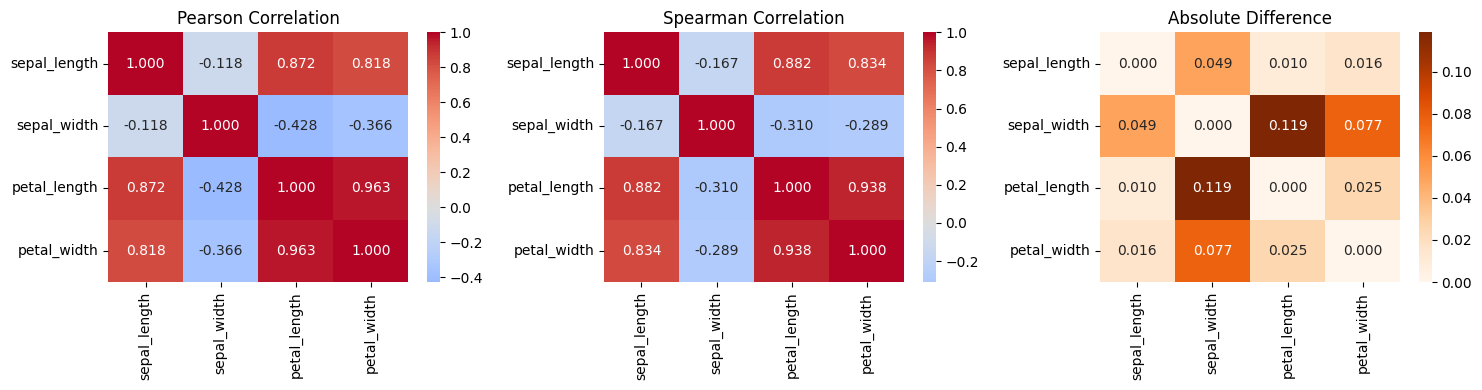


Largest differences occur where relationships may be non-linear but monotonic.


In [54]:
# Exercise 2.3: Compare Pearson vs Spearman matrices
iris_numeric = iris.select_dtypes(include=[np.number])
pearson_matrix = iris_numeric.corr(method='pearson')
spearman_matrix = iris_numeric.corr(method='spearman')

# Difference matrix
diff_matrix = (pearson_matrix - spearman_matrix).abs()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0], fmt='.3f')
axes[0].set_title('Pearson Correlation')

sns.heatmap(spearman_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1], fmt='.3f')
axes[1].set_title('Spearman Correlation')

sns.heatmap(diff_matrix, annot=True, cmap='Oranges', ax=axes[2], fmt='.3f')
axes[2].set_title('Absolute Difference')

plt.tight_layout()
plt.show()

print("\nLargest differences occur where relationships may be non-linear but monotonic.")

---
## 3. Contingency Tables and Chi-Square Test

**Contingency tables** (cross-tabulations) show the frequency distribution of categorical variables. The **Chi-square test** measures the association between them.

$$\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

where $O_{ij}$ = observed frequency, $E_{ij}$ = expected frequency under independence.

**Example:**

In [55]:
# Create contingency table: survival by passenger class
contingency = pd.crosstab(df['pclass'], df['survived'])
print("Contingency Table: Passenger Class vs Survival")
contingency

Contingency Table: Passenger Class vs Survival


survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [56]:
# Add margins (totals)
contingency_margins = pd.crosstab(df['pclass'], df['survived'], margins=True)
contingency_margins

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [57]:
# Chi-square test of independence
chi2, _, dof, expected_freq = stats.chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"\nExpected frequencies under independence:")
print(pd.DataFrame(expected_freq, 
                   index=contingency.index, 
                   columns=contingency.columns).round(2))

Chi-square statistic: 102.8890
Degrees of freedom: 2

Expected frequencies under independence:
survived       0       1
pclass                  
1         133.09   82.91
2         113.37   70.63
3         302.54  188.46


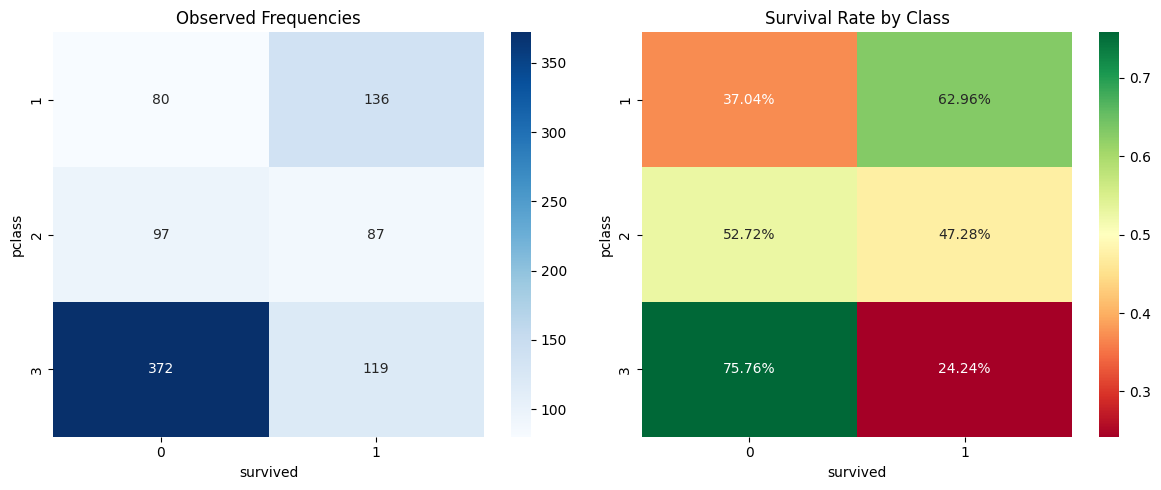

In [58]:
# Visualize contingency table
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw counts
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Observed Frequencies')

# Normalized by row (survival rate per class)
contingency_norm = pd.crosstab(df['pclass'], df['survived'], normalize='index')
sns.heatmap(contingency_norm, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[1])
axes[1].set_title('Survival Rate by Class')

plt.tight_layout()
plt.show()

### Exercise 3: Contingency Tables

**3.1** Create a categorical column in iris: `sepal_size` based on `sepal_length` (Small: < 5.5, Medium: 5.5-6.5, Large: > 6.5).

**3.2** Create a contingency table between `species` and `sepal_size`.

**3.3** Perform a chi-square test. Is there a significant association between species and sepal size?

**3.4** Visualize the contingency table as a heatmap with row-normalized proportions.

In [59]:
# Exercise 3.1: Create sepal_size categorical column
def categorize_sepal(length):
    if length < 5.5:
        return 'Small'
    elif length <= 6.5:
        return 'Medium'
    else:
        return 'Large'

iris['sepal_size'] = iris['sepal_length'].apply(categorize_sepal)
iris['sepal_size'] = pd.Categorical(iris['sepal_size'], categories=['Small', 'Medium', 'Large'], ordered=True)
iris[['sepal_length', 'sepal_size']].head(10)

,sepal_length,sepal_size
0,5.1,Small
1,4.9,Small
2,4.7,Small
3,4.6,Small
4,5.0,Small
5,5.4,Small
6,4.6,Small
7,5.0,Small
8,4.4,Small
9,4.9,Small


In [60]:
# Exercise 3.2: Contingency table (species vs sepal_size)
contingency_iris = pd.crosstab(iris['species'], iris['sepal_size'])
print("Contingency Table: Species vs Sepal Size")
contingency_iris

Contingency Table: Species vs Sepal Size


sepal_size,Small,Medium,Large
species,,,
setosa,45,5,0
versicolor,6,36,8
virginica,1,27,22


In [61]:
# Exercise 3.3: Chi-square test
chi2, _, dof, expected = stats.chi2_contingency(contingency_iris)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"\nExpected frequencies under independence:")
print(pd.DataFrame(expected, 
                   index=contingency_iris.index, 
                   columns=contingency_iris.columns).round(2))

Chi-square statistic: 114.2027
Degrees of freedom: 4

Expected frequencies under independence:
sepal_size  Small  Medium  Large
species                         
setosa      17.33   22.67   10.0
versicolor  17.33   22.67   10.0
virginica   17.33   22.67   10.0


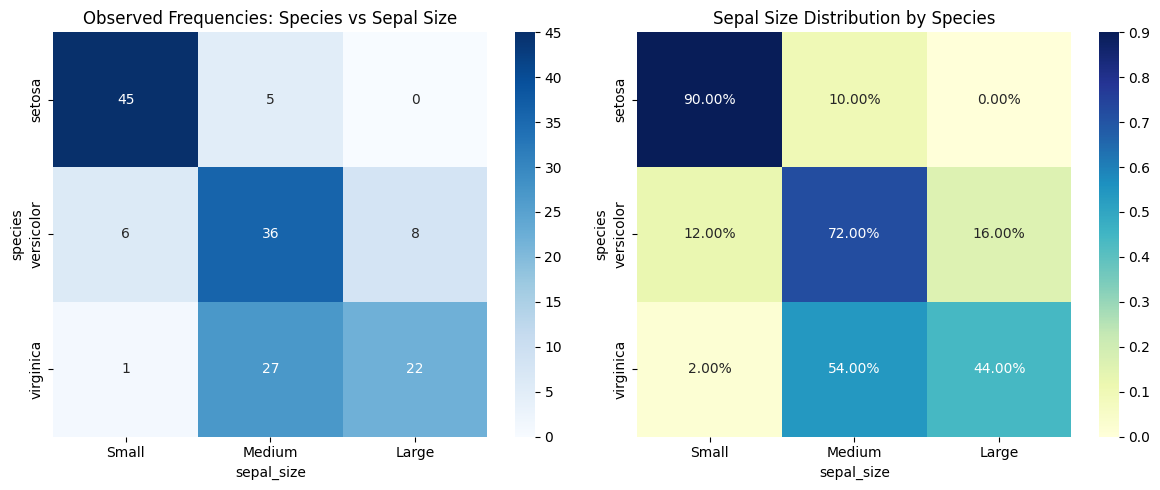

In [62]:
# Exercise 3.4: Heatmap visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw counts
sns.heatmap(contingency_iris, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Observed Frequencies: Species vs Sepal Size')

# Normalized by row (proportion per species)
contingency_norm = pd.crosstab(iris['species'], iris['sepal_size'], normalize='index')
sns.heatmap(contingency_norm, annot=True, fmt='.2%', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Sepal Size Distribution by Species')

plt.tight_layout()
plt.show()

---
## 4. Cramér's V

**Cramér's V** measures the strength of association between two categorical variables, based on the chi-square statistic. It ranges from 0 (no association) to 1 (perfect association).

$$V = \sqrt{\frac{\chi^2}{n \cdot \min(r-1, c-1)}}$$

where $n$ = sample size, $r$ = number of rows, $c$ = number of columns.

**Interpretation guidelines:**
- V < 0.1: Negligible
- 0.1 ≤ V < 0.3: Small
- 0.3 ≤ V < 0.5: Medium
- V ≥ 0.5: Large

**Example:**

In [63]:
def cramers_v(contingency_table):
    """Calculate Cramér's V from a contingency table."""
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, c = contingency_table.shape
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

# Calculate Cramér's V for passenger class vs survival
contingency = pd.crosstab(df['pclass'], df['survived'])
v = cramers_v(contingency)
print(f"Cramér's V (pclass vs survived): {v:.4f}")

Cramér's V (pclass vs survived): 0.3398


In [64]:
# Compare association strength for different variable pairs
pairs = [
    ('pclass', 'survived'),
    ('sex', 'survived'),
    ('embarked', 'pclass'),
    ('sex', 'pclass')
]

print("Cramér's V for different variable pairs:")
print("-" * 40)
for var1, var2 in pairs:
    ct = pd.crosstab(df[var1].dropna(), df[var2].dropna())
    v = cramers_v(ct)
    print(f"{var1:12s} vs {var2:12s}: V = {v:.4f}")

Cramér's V for different variable pairs:
----------------------------------------
pclass       vs survived    : V = 0.3398
sex          vs survived    : V = 0.5409
embarked     vs pclass      : V = 0.2638
sex          vs pclass      : V = 0.1380


### Exercise 4: Cramér's V

**4.1** Calculate Cramér's V for the association between `species` and `sepal_size` in iris.

**4.2** Create another categorical variable `petal_size` (Small: < 2.5, Medium: 2.5-5, Large: > 5 based on `petal_length`) and calculate Cramér's V between `species` and `petal_size`.

**4.3** Which variable (`sepal_size` or `petal_size`) has a stronger association with species?

In [65]:
# Exercise 4.1: Cramér's V for species vs sepal_size
contingency_sepal = pd.crosstab(iris['species'], iris['sepal_size'])
v_sepal = cramers_v(contingency_sepal)
print(f"Cramér's V (species vs sepal_size): {v_sepal:.4f}")

Cramér's V (species vs sepal_size): 0.6170


In [66]:
# Exercise 4.2: Create petal_size and calculate Cramér's V with species
def categorize_petal(length):
    if length < 2.5:
        return 'Small'
    elif length <= 5:
        return 'Medium'
    else:
        return 'Large'

iris['petal_size'] = iris['petal_length'].apply(categorize_petal)
iris['petal_size'] = pd.Categorical(iris['petal_size'], categories=['Small', 'Medium', 'Large'], ordered=True)

contingency_petal = pd.crosstab(iris['species'], iris['petal_size'])
v_petal = cramers_v(contingency_petal)
print(f"Cramér's V (species vs petal_size): {v_petal:.4f}")

contingency_petal

Cramér's V (species vs petal_size): 0.9102


petal_size,Small,Medium,Large
species,,,
setosa,50,0,0
versicolor,0,49,1
virginica,0,9,41


In [67]:
# Exercise 4.3: Compare association strengths
print("Association Strength Comparison:")
print("-" * 40)
print(f"Species vs Sepal Size: V = {v_sepal:.4f}")
print(f"Species vs Petal Size: V = {v_petal:.4f}")
print()
if v_petal > v_sepal:
    print("→ Petal size has a STRONGER association with species.")
    print("  This makes sense because petal characteristics are more ")
    print("  distinctive across iris species than sepal characteristics.")
else:
    print("→ Sepal size has a stronger association with species.")

Association Strength Comparison:
----------------------------------------
Species vs Sepal Size: V = 0.6170
Species vs Petal Size: V = 0.9102

→ Petal size has a STRONGER association with species.
  This makes sense because petal characteristics are more 
  distinctive across iris species than sepal characteristics.


---
## 5. Conditional Correlation

**Conditional correlation** examines the relationship between two variables within subgroups defined by a third variable. This helps:
- Detect **Simpson's Paradox** (overall correlation differs from within-group correlations)
- Control for confounding variables
- Understand heterogeneous relationships

**Example:**

In [68]:
# Overall correlation: age vs fare
overall_corr = df['age'].corr(df['fare'])
print(f"Overall Pearson correlation (age vs fare): {overall_corr:.4f}")

Overall Pearson correlation (age vs fare): 0.0961


In [69]:
# Conditional correlation: age vs fare BY passenger class
print("\nConditional correlations by passenger class:")
print("-" * 40)

for pclass in sorted(df['pclass'].dropna().unique()):
    subset = df[df['pclass'] == pclass][['age', 'fare']].dropna()
    if len(subset) > 2:
        r = subset['age'].corr(subset['fare'])
        print(f"Class {pclass}: r = {r:.4f} (n={len(subset)})")


Conditional correlations by passenger class:
----------------------------------------
Class 1: r = -0.2186 (n=186)
Class 2: r = -0.1970 (n=173)
Class 3: r = -0.2603 (n=355)


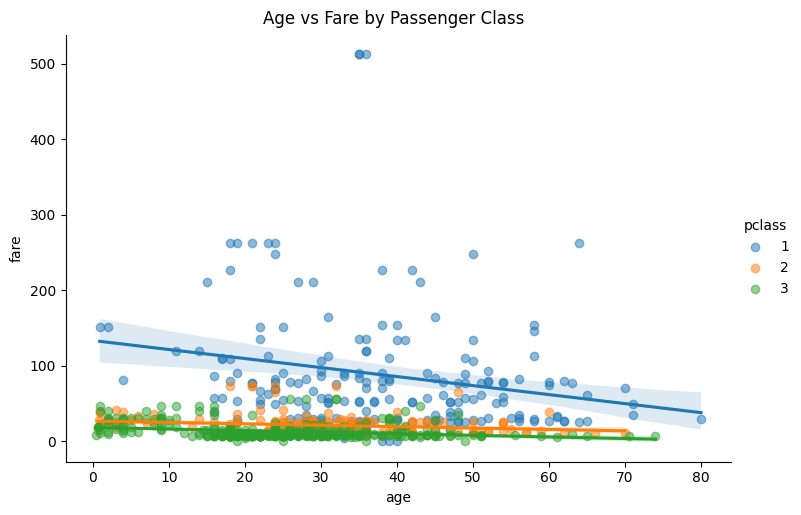

In [70]:
# Visualize conditional correlations
g = sns.lmplot(data=df, x='age', y='fare', hue='pclass', 
               height=5, aspect=1.5, scatter_kws={'alpha': 0.5})
g.figure.suptitle('Age vs Fare by Passenger Class', y=1.02)
plt.show()

In [71]:
# Simpson's Paradox Example: sex, class, and survival
print("Survival rate by sex (overall):")
print(df.groupby('sex')['survived'].mean())

print("\nSurvival rate by sex AND class:")
print(df.groupby(['pclass', 'sex'])['survived'].mean().unstack())

Survival rate by sex (overall):
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Survival rate by sex AND class:
sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [72]:
# Function to compute conditional correlations systematically
def conditional_correlation(data, var1, var2, condition_var, method='pearson'):
    """Calculate correlation between var1 and var2 for each level of condition_var."""
    results = []
    
    for level in data[condition_var].dropna().unique():
        subset = data[data[condition_var] == level][[var1, var2]].dropna()
        if len(subset) > 2:
            if method == 'pearson':
                r = subset[var1].corr(subset[var2])
            else:
                r = subset[var1].corr(subset[var2], method='spearman')
            results.append({
                'condition': level,
                'correlation': r,
                'n': len(subset)
            })
    
    return pd.DataFrame(results)

# Example usage
cond_corr = conditional_correlation(df, 'age', 'fare', 'pclass')
print("Conditional correlations (age vs fare by class):")
cond_corr

Conditional correlations (age vs fare by class):


,condition,correlation,n
0,3,-0.260315,355
1,1,-0.218611,186
2,2,-0.197038,173


### Exercise 5: Conditional Correlation

**5.1** Calculate the overall Pearson correlation between `sepal_length` and `petal_length` in iris.

**5.2** Calculate the conditional correlation between `sepal_length` and `petal_length` for each species.

**5.3** Create a scatter plot with regression lines for each species (use `sns.lmplot`).

**5.4** Does the relationship between sepal and petal length differ across species? Discuss Simpson's Paradox if applicable.

In [73]:
# Exercise 5.1: Overall correlation (sepal_length vs petal_length)
overall_corr = iris['sepal_length'].corr(iris['petal_length'])
print(f"Overall Pearson correlation (sepal_length vs petal_length): {overall_corr:.4f}")

Overall Pearson correlation (sepal_length vs petal_length): 0.8718


In [74]:
# Exercise 5.2: Conditional correlations by species
print("\nConditional correlations by species:")
print("-" * 50)

for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    r = subset['sepal_length'].corr(subset['petal_length'])
    print(f"{species:12s}: r = {r:.4f} (n={len(subset)})")


Conditional correlations by species:
--------------------------------------------------
setosa      : r = 0.2672 (n=50)
versicolor  : r = 0.7540 (n=50)
virginica   : r = 0.8642 (n=50)


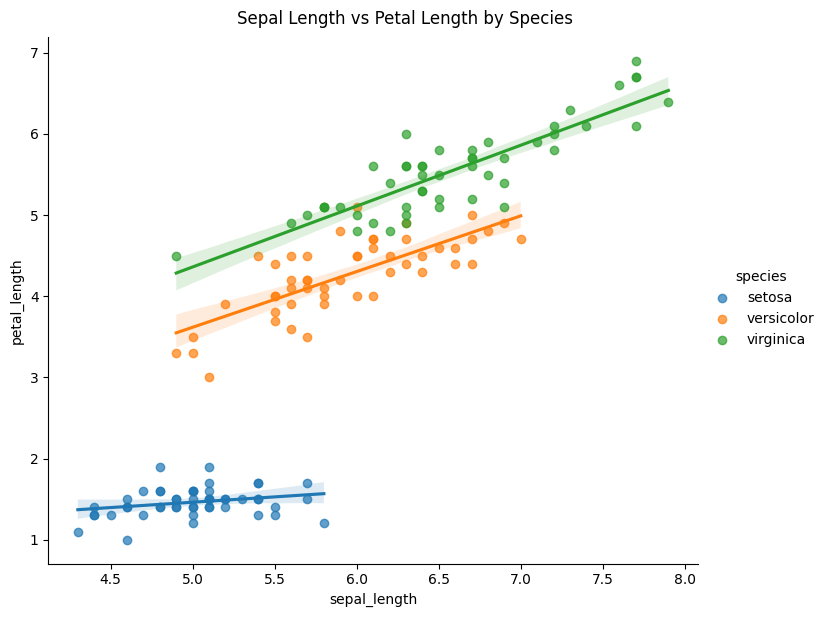

In [75]:
# Exercise 5.3: Scatter plot with regression lines by species
g = sns.lmplot(data=iris, x='sepal_length', y='petal_length', hue='species',
               height=6, aspect=1.2, scatter_kws={'alpha': 0.7})
g.figure.suptitle('Sepal Length vs Petal Length by Species', y=1.02)
plt.show()

In [76]:
# Exercise 5.4: Discussion of results
print("ANALYSIS: Conditional Correlation Results")
print("=" * 60)
print(f"\nOverall correlation: r = {overall_corr:.4f}")
print("\nWithin-species correlations show DIFFERENT patterns:")
print("- Setosa: Weak correlation (small, clustered values)")
print("- Versicolor: Moderate-strong positive correlation")
print("- Virginica: Moderate-strong positive correlation")
print("\nSimpson's Paradox consideration:")
print("- The overall strong correlation (r ≈ 0.87) is partly driven")
print("  by the BETWEEN-group differences rather than WITHIN-group relationships")
print("- Species acts as a confounding variable")
print("- When we condition on species, we see the true within-species relationships")

ANALYSIS: Conditional Correlation Results

Overall correlation: r = 0.8718

Within-species correlations show DIFFERENT patterns:
- Setosa: Weak correlation (small, clustered values)
- Versicolor: Moderate-strong positive correlation
- Virginica: Moderate-strong positive correlation

Simpson's Paradox consideration:
- The overall strong correlation (r ≈ 0.87) is partly driven
  by the BETWEEN-group differences rather than WITHIN-group relationships
- Species acts as a confounding variable
- When we condition on species, we see the true within-species relationships


---
## 6. Summary: Choosing the Right Measure

| Data Types | Measure | Use When |
|------------|---------|----------|
| Continuous vs Continuous | Pearson r | Linear relationship assumed |
| Continuous vs Continuous | Spearman ρ | Monotonic relationship, outliers present, ordinal data |
| Categorical vs Categorical | Chi-square test | Testing independence |
| Categorical vs Categorical | Cramér's V | Measuring association strength |
| Any | Conditional correlation | Controlling for confounders, subgroup analysis |

**Key Takeaways:**
1. Always visualize data before calculating correlations
2. Correlation ≠ Causation
3. Check for non-linear patterns that linear measures might miss
4. Consider confounders and calculate conditional correlations
5. For categorical variables, use appropriate measures (Chi-square, Cramér's V)

---
## 7. Comprehensive Exercise

Using the Titanic dataset, perform a complete association analysis:

**7.1** Create a categorical age variable: `age_group` (Child: < 18, Adult: 18-60, Senior: > 60)

**7.2** Analyze the association between `age_group` and `survived`:
   - Create a contingency table
   - Perform chi-square test
   - Calculate Cramér's V
   - Visualize with a heatmap

**7.3** Calculate conditional correlation between `age` and `fare` grouped by `sex`

**7.4** Create a summary visualization showing:
   - Correlation heatmap of numeric variables
   - Bar plot of survival rates by age group and sex

In [77]:
# Exercise 7.1: Create age_group
def age_to_group(age):
    if pd.isna(age):
        return np.nan
    elif age < 18:
        return 'Child'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_to_group)
df['age_group'] = pd.Categorical(df['age_group'], categories=['Child', 'Adult', 'Senior'], ordered=True)
df[['age', 'age_group']].head(10)

,age,age_group
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,NaN
6,54.0,Adult
7,2.0,Child
8,27.0,Adult
9,14.0,Child


Contingency Table: Age Group vs Survival
survived     0    1
age_group          
Child       52   61
Adult      355  224
Senior      17    5

Chi-square test:
  χ² = 12.1819, dof = 2

Cramér's V = 0.1306


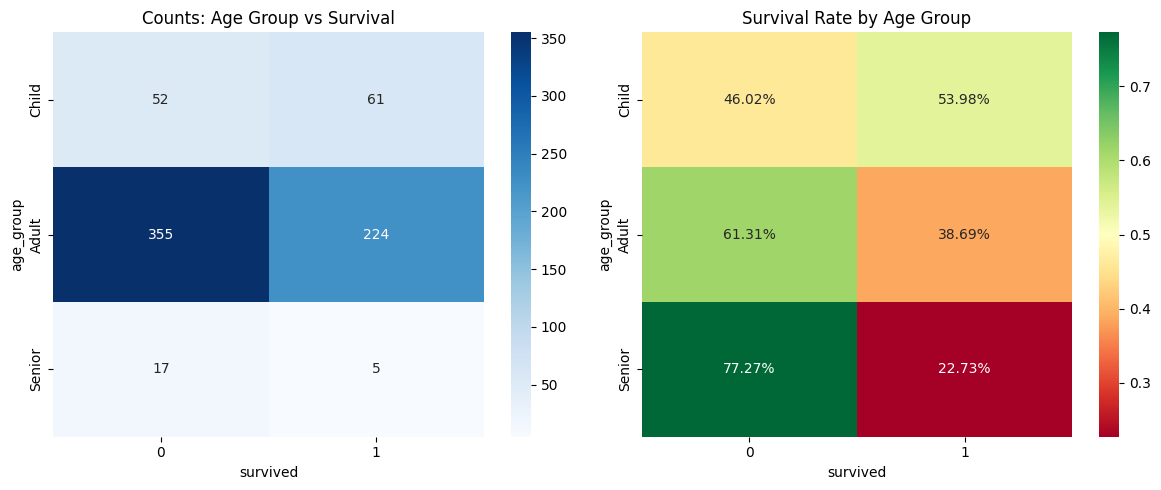

In [78]:
# Exercise 7.2: Association analysis (age_group vs survived)
# Contingency table
contingency = pd.crosstab(df['age_group'], df['survived'])
print("Contingency Table: Age Group vs Survival")
print(contingency)

# Chi-square test
chi2, _, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-square test:")
print(f"  χ² = {chi2:.4f}, dof = {dof}")

# Cramér's V
v = cramers_v(contingency)
print(f"\nCramér's V = {v:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Counts: Age Group vs Survival')

contingency_norm = pd.crosstab(df['age_group'], df['survived'], normalize='index')
sns.heatmap(contingency_norm, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[1])
axes[1].set_title('Survival Rate by Age Group')
plt.tight_layout()
plt.show()

Conditional Correlation: Age vs Fare by Sex
--------------------------------------------------
male    : r = 0.0773 (n=453)
female  : r = 0.1715 (n=261)


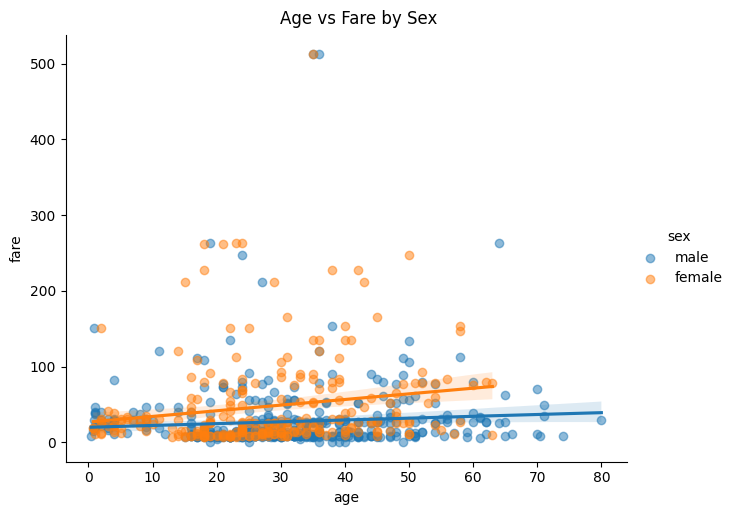

In [79]:
# Exercise 7.3: Conditional correlation (age vs fare by sex)
print("Conditional Correlation: Age vs Fare by Sex")
print("-" * 50)

for sex in df['sex'].dropna().unique():
    subset = df[df['sex'] == sex][['age', 'fare']].dropna()
    r = subset['age'].corr(subset['fare'])
    print(f"{sex:8s}: r = {r:.4f} (n={len(subset)})")

# Visualization
g = sns.lmplot(data=df, x='age', y='fare', hue='sex', 
               height=5, aspect=1.3, scatter_kws={'alpha': 0.5})
g.figure.suptitle('Age vs Fare by Sex', y=1.02)
plt.show()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_41055/584688041.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_group = df.groupby(['age_group', 'sex'])['survived'].mean().unstack()


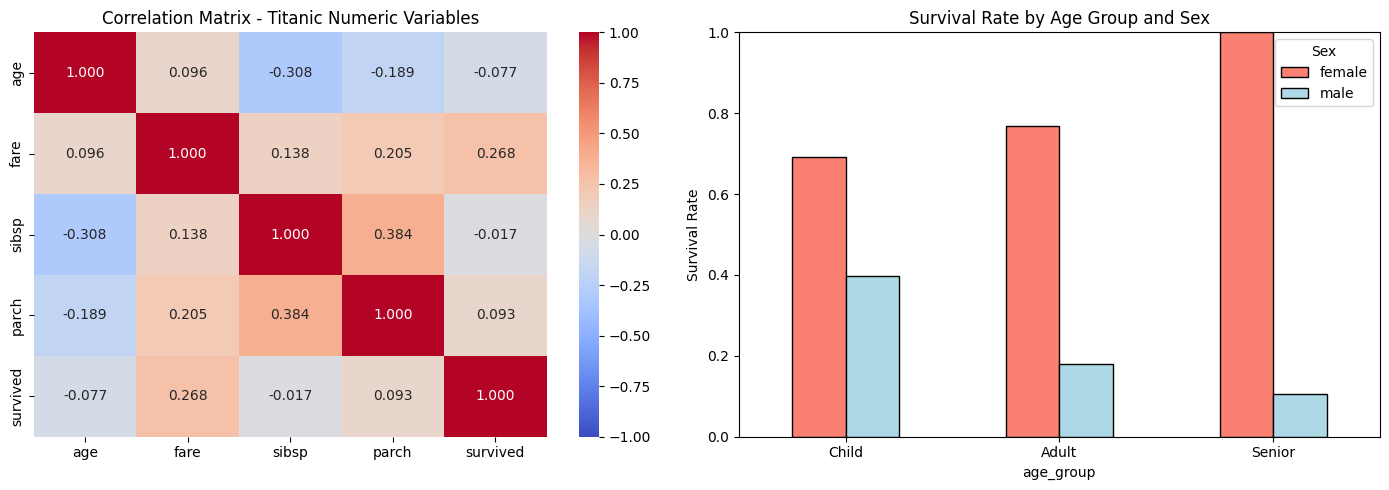

In [80]:
# Exercise 7.4: Summary visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Correlation heatmap of numeric variables
numeric_cols = df[['age', 'fare', 'sibsp', 'parch', 'survived']].dropna()
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            vmin=-1, vmax=1, fmt='.3f', ax=axes[0])
axes[0].set_title('Correlation Matrix - Titanic Numeric Variables')

# Bar plot of survival rates by age group and sex
survival_by_group = df.groupby(['age_group', 'sex'])['survived'].mean().unstack()
survival_by_group.plot(kind='bar', ax=axes[1], color=['salmon', 'lightblue'], edgecolor='black')
axes[1].set_ylabel('Survival Rate')
axes[1].set_title('Survival Rate by Age Group and Sex')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Sex')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()